<a href="https://colab.research.google.com/github/programmarself/Space-Mission-From-1957-Data-Analysis/blob/main/Space_Mission_From_1957_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Space Mission from 1957 Data Analysis


<h2 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨💻Author: Irfan Ullah Khan</h2>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/programmarself)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/programmarself)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/irfan-ullah-khan-4a2871208/)  

[![YouTube](https://img.shields.io/badge/YouTube-Profile-red?style=for-the-badge&logo=youtube)](https://www.youtube.com/@irfanullahkhan7748)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:programmarself@gmail.com)
[![Website](https://img.shields.io/badge/Website-Contact%20Me-red?style=for-the-badge&logo=website)](https://flowcv.me/ikm)

## What will you learn from this project?
* Bivariate Analysis
* Data Visualization Techniques (Sunburst Chart, World Map Chart, Barplot, Subplot)
* Feature Extraction
* Data Preprocessing
* Comparison of Features
* Exploratory Data Analysis (EDA)

## Introduction
This data analysis focuses on space missions conducted from 1957 to 2020. Since the launch of Sputnik-1 by the Soviet Union in 1957, many countries have participated in space explorations. The study aims to summarize the evolution of space explorations by examining missions, launch vehicles, and scientific objectives carried out by different countries' space agencies. This data analysis intends to provide a brief overview of the fascinating story of space explorations.

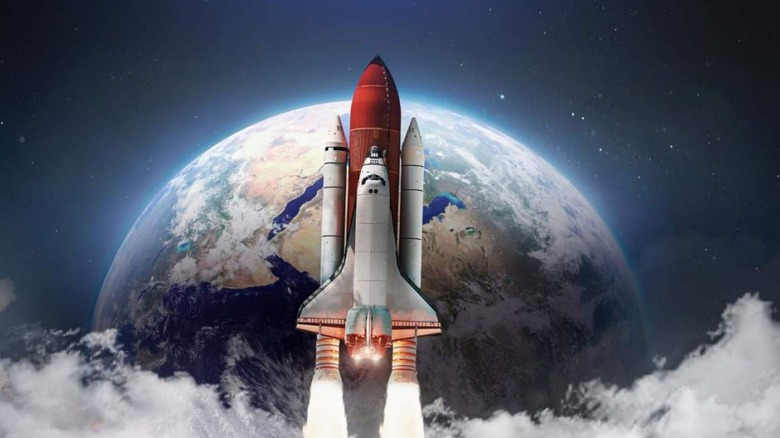



## Analysis Content
1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read and Analyze Data](#3)
4. [Number of Launches by Each Company](#4)
5. [Rocket Status](#5)
6. [Mission Status](#6)
7. [Rocket Cost Distribution with Rocket Status](#7)
8. [Rocket Cost Distribution with Mission Status](#8)
9. [Total Spent Money for Each Company](#9)
10. [Number of Missions by Year](#10)
11. [Countries and Mission Status](#11)
12. [Sunburst Chart Analysis](#12)
13. [Status Mission by Countries in World Map](#13)
14. [Conclusion](#14)

<a id='1'></a>
## 1. Python Libraries
* Importing the necessary libraries into the code.

In [1]:
#to get countries
!pip install iso3166

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from iso3166 import countries # you can import countries with an external dataset or with this library
#for visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#for preprocessing
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


<a id='2'></a>
## 2. Data Content
* **Company Name:** Company name
* **Location:** Location of the launch
* **Datum:** Datum and time of the launch
* **Detail:** Rocket name
* **Status Rocket:** Status of the rocket (active, retired)
* **Rocket:** Cost of the mission
* **Status Mission:** Status of the mission (success, failure, partial failure, prelaunch failure)

<a id='3'></a>
## 3. Read and Analyze Data

In [5]:
df = pd.read_csv("Space_Mission.csv")

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [7]:
#check column names before dropping
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

In [8]:
#drop unnecessary columns
df = df.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"], axis=1)

In [9]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [10]:
df.info()

#the data type for all columns, including columns with numeric values, is object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [11]:
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


* Since 1957, there have been 4,324 launches conducted by 56 unique companies at 137 unique locations.

<a id='4'></a>
## 4. Number of Launches by Each Company
* How many launches did the companies carry out?

In [12]:
ds = df["Company Name"].value_counts().reset_index()[:28]
ds

,Company Name,count
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [13]:
#visualization of number of launches
fig = go.Figure(go.Bar(x = ds[ds.columns[0]],
                       y = ds[ds.columns[1]],
                       marker = dict( color = ds[ds.columns[1]],
                                    colorscale = "bluered")))
fig.update_layout(title = "Number of Launches by Each Company", xaxis_title = "Top 28 Country", yaxis_title = "count", hovermode = "x")
fig.show()

<a id='5'></a>
## 5. Rocket Status
* Are the rockets still working or are they inactive?

In [14]:
ds = df["Status Rocket"].value_counts().reset_index()
ds

,Status Rocket,count
0,StatusRetired,3534
1,StatusActive,790


* There are 3534 rockets that are no longer in use and 790 rockets still in active use

In [15]:
#visualization of rocket status
fig = px.pie(ds, values = ds[ds.columns[1]], names = ds[ds.columns[0]], title = "Rocket Status")
fig.show()

* While 81.7% of the rockets launched from 1957 to 2020, which corresponds to 3534 rockets, are not currently in use, the remaining 18.3%, that is, 790 rockets, are still in active use.

<a id='6'></a>
## 6. Mission Status
* What is the success status of launch missions? Success, failure, partial failure or prelaunch failure?

In [16]:
ds = df["Status Mission"].value_counts().reset_index()
ds

,Status Mission,count
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


* 3879 launches were successfully completed, 339 launches ended in failure, 102 launches resulted in partial success, and 4 launches were pre-launch failures.

In [17]:
#visualization of mission status
fig = px.bar(ds, x = ds[ds.columns[0]], y = ds[ds.columns[1]], title = "Mission Status")
fig.show()

<a id='7'></a>
## 7. Rocket Cost Distribution with Rocket Status
* Examining the relationship between whether the rocket is currently used and the cost of the rocket.

In [18]:
#number of null values in " Rocket" column
np.sum(pd.isnull(df.loc[:," Rocket"]))

3360

In [19]:
#dropping null values in " Rocket" column
df2 = df.dropna(subset = [" Rocket"])

In [20]:
#checking if there are still null values
np.sum(pd.isnull(df2.loc[:," Rocket"]))

0

In [21]:
df2.loc[:," Rocket"]

#dtype = object so we need to convert them to float

0        50.0 
1       29.75 
3        65.0 
4       145.0 
5       64.68 
         ...  
3855     59.0 
3971    63.23 
3993    63.23 
4000    63.23 
4020    63.23 
Name:  Rocket, Length: 964, dtype: object

In [22]:
#converting object values into float
df2.loc[:, " Rocket"] = df2.loc[:, " Rocket"].fillna(0.0).str.replace(",","")
df2.loc[:, " Rocket"] = df2.loc[:, " Rocket"].astype(np.float64).fillna(0.0)

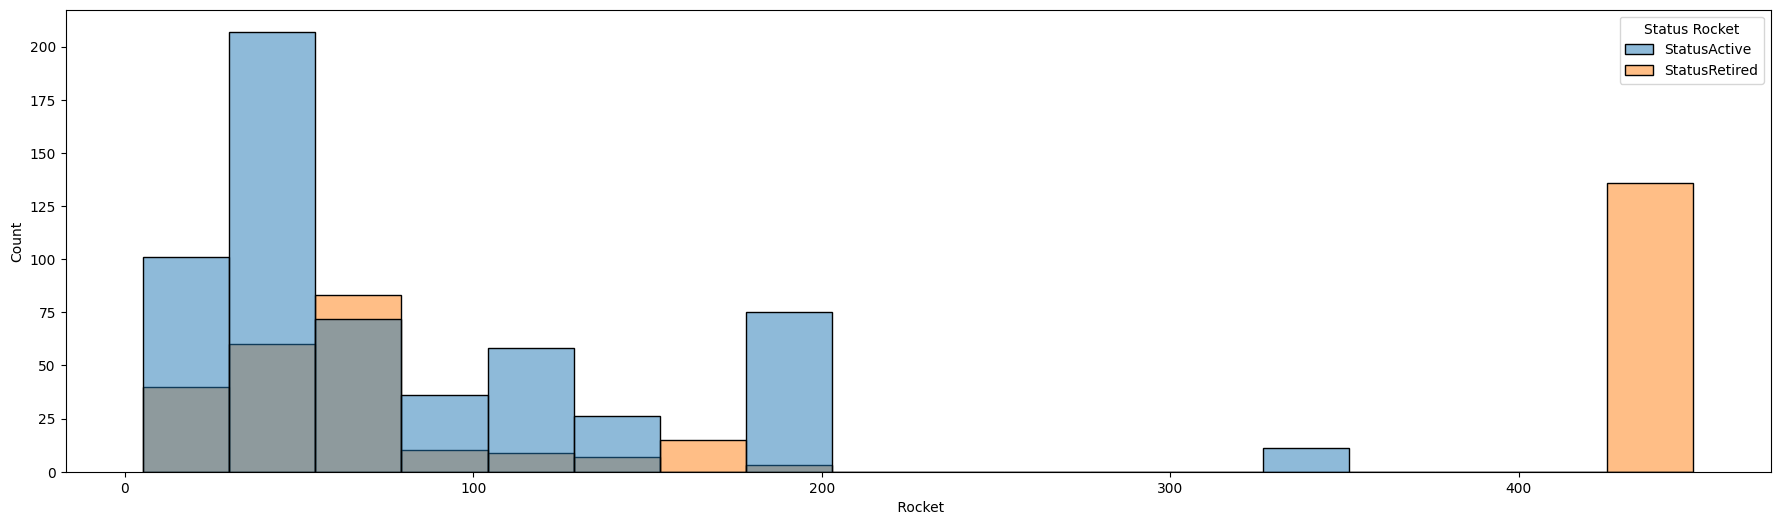

In [23]:
#visualization of correlation with histogram
df_d = df2[df2.loc[:, " Rocket"]<1000]
plt.figure(figsize = (22,6))
sns.histplot(data = df_d, x = " Rocket", hue = "Status Rocket")
plt.show()

* The cost is more than 400 units for around 150 currently unused rockets (the rightmost orange bar). It was determined that rockets with lower costs are currently in active use, and the cost of the most actively used rockets currently ranges between 25 and 50 units.

<a id='8'></a>
## 8. Rocket Cost Distribution with Mission Status
* Investigating the correlation between the cost distribution of rockets and the success or failure of missions.

In [24]:
#number of null values in "Status Mission" column
np.sum(pd.isnull(df.loc[:,"Status Mission"]))

0

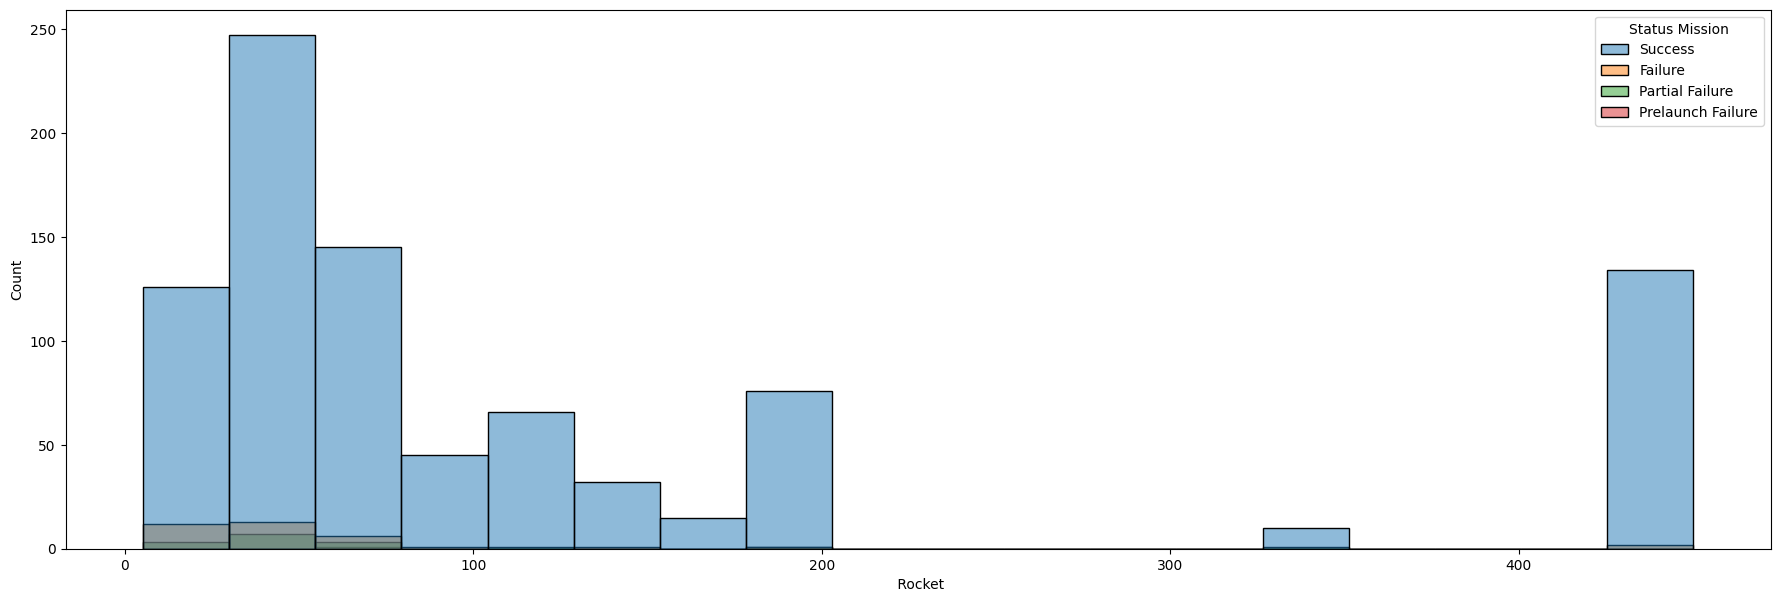

In [25]:
plt.figure(figsize = (22,7))
sns.histplot(data = df_d, x = " Rocket", hue = "Status Mission")
plt.show()

* While the majority of missions with a cost exceeding 400 units have been successful (the rightmost blue bar), there are a few instances that ended in failure. Additionally, it was observed that missions with a cost between 0 and 50 units mostly resulted in success, but there were also instances of failure or partial failure.
* It has also been observed that most of the missions costing 100-200 units are completed successfully.

<a id='9'></a>
## 9. Total Spent Money for Each Company
* Total money spent by companies to launch rockets.

In [26]:
df2.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [27]:
#finding the cost of each company
df_money = df2.groupby(["Company Name"])[" Rocket"].sum().reset_index()
df_money

,Company Name,Rocket
0,Arianespace,16345.0
1,Boeing,1241.0
2,CASC,6340.26
3,EER,20.0
4,ESA,37.0
5,Eurockot,543.4
6,ExPace,28.3
7,ILS,1320.0
8,ISRO,2177.0
9,JAXA,168.0


In [28]:
#sorting costs
df_money = df_money.sort_values([" Rocket"], ascending = False)
df_money.head()

,Company Name,Rocket
14,NASA,76280.0
0,Arianespace,16345.0
21,ULA,14798.0
16,RVSN USSR,10000.0
2,CASC,6340.26


In [29]:
#visualization of costs with barplot
fig = px.bar(df_money, x = "Company Name", y = " Rocket", title = "Total Spent Money for Each Company")
fig.show()

* It was observed that the company that spent the most money to launch a rocket was NASA, spending a total of 76.28k units, while the company that spent the least money was Virgin Orbit, with a cost of 12 units.
* SpaceX ranked 6th with a cost of 5444 units.

<a id='10'></a>
## 10. Number of Missions by Year
* How many rockets were sent in which year? In which years did the space race accelerate?

In [30]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [31]:
#converting data in "Datum" column to datetime data type
df["date"] = pd.to_datetime(df["Datum"], errors='coerce')
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00


In [32]:
df.dropna(subset=["date"])

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00


In [33]:
#extracting "year" from date
df["year"] = df["date"].apply(lambda datetime: datetime.year)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020.0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020.0
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020.0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020.0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020.0


In [34]:
df.dropna(subset=["year"], inplace=True)

In [35]:
#converting float values in the year column to int
df["year"] = df["year"].astype(int)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020


In [36]:
#number of rockets launched by year
ds = df["year"].value_counts().reset_index()
ds

,year,count
0,2018,117
1,1971,116
2,1975,112
3,1976,109
4,1977,109
...,...,...
59,2010,36
60,2012,34
61,1958,22
62,1959,20


In [37]:
#visualization with barplot
fig = px.bar(ds, x = ds.columns[0], y = ds.columns[1], title = "Missions Number by Year")
fig.show()

* Between 1960 and 1980, and according to the graph, launches were carried out intensively in the last 5 years.
* Between 1980 and 2010, an average of 60-70 rockets were launched per year.
* The most rockets were launched in 2018, with 117, and in 1971, which ranked second, with 116 rockets.

<a id='11'></a>
## 11. Countries and Mission Status
* The success or failure of missions on a country-by-country basis.

In [38]:
df["Status Mission"]

0       Success
1       Success
2       Success
3       Success
4       Success
         ...   
4319    Failure
4320    Success
4321    Failure
4322    Success
4323    Success
Name: Status Mission, Length: 4198, dtype: object

In [39]:
#endocing with label encoder
encoder = LabelEncoder()
encoder.fit(df["Status Mission"])
encoder

LabelEncoder()

In [40]:
#assigning color to encoded values
colors = {
    0: "red",
    1: "orange",
    2: "yellow",
    3: "green"
}
colors

{0: 'red', 1: 'orange', 2: 'yellow', 3: 'green'}

In [41]:
df["Location"]

0              LC-39A, Kennedy Space Center, Florida, USA
1       Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                           Pad A, Boca Chica, Texas, USA
3            Site 200/39, Baikonur Cosmodrome, Kazakhstan
4                SLC-41, Cape Canaveral AFS, Florida, USA
                              ...                        
4319             LC-18A, Cape Canaveral AFS, Florida, USA
4320             LC-26A, Cape Canaveral AFS, Florida, USA
4321             LC-18A, Cape Canaveral AFS, Florida, USA
4322            Site 1/5, Baikonur Cosmodrome, Kazakhstan
4323            Site 1/5, Baikonur Cosmodrome, Kazakhstan
Name: Location, Length: 4198, dtype: object

In [42]:
countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}

#take the last value of the "Location" strings and convert these values by dictionary if it's necessary
df["country"] = df["Location"].str.split(", ").str[-1].replace(countries_dict)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,USA


In [43]:
#visualization of 16 countries with subplot
fig = make_subplots(rows = 4, cols = 4, subplot_titles = df["country"].unique())
for i, country in enumerate(df["country"].unique()):
    counts = df[df["country"] == country]["Status Mission"].value_counts(normalize = True)*100 #to get the percentage
    color = [colors[x] for x in encoder.transform(counts.index)]
    trace = go.Bar(x = counts.index, y = counts.values, name = country, marker = {"color" : color}, showlegend = False)
    fig.add_trace(trace, row = (i//4) + 1, col = (i%4)+1)
fig.update_layout(title = {"text":"Countries and Mission Status"}, height = 1000, width = 1100)
for i in range(1,5):
    fig.update_yaxes(title_text = "Percentage", row = i, col = 1)
fig.show()

<a id='12'></a>
## 12. Sunburst Chart Analysis
* Combining success analyzes of companies and countries.

In [44]:
sun = df.groupby(["country", "Company Name", "Status Mission"])["Datum"].count().reset_index()
sun.head()

,country,Company Name,Status Mission,Datum
0,Australia,CECLES,Failure,2
1,Australia,CECLES,Success,1
2,Australia,RAE,Failure,1
3,Australia,RAE,Success,1
4,Brazil,AEB,Failure,1


In [45]:
#selecting just 4 countries
sun = sun[(sun.country == "USA") | (sun.country == "China") | (sun.country == "Russian Federation") | (sun.country == "France")]
sun.head()

,country,Company Name,Status Mission,Datum
5,China,CASC,Failure,13
6,China,CASC,Partial Failure,6
7,China,CASC,Success,230
8,China,CASIC,Success,3
9,China,ExPace,Failure,1


In [46]:
#visualization with sunburst chart
fig = px.sunburst(sun, path = ["country", "Company Name", "Status Mission"], values = "Datum", title = "Sunburst Chart for Some Countries")
fig.show()

* The innermost circle shows the selected countries, the 2nd circle shows the launching companies of the countries, and the outermost circle shows the success status.

<a id='13'></a>
## 13. Status Mission by Countries in World Map
* Visualizing the status of launches by countries on the world map.

In [47]:
#creating a dictionary with abbreviated names of countries
#alpha3 = abbreviation
country_dict = dict()
for c in countries:
    country_dict[c.name] = c.alpha3
df["alpha3"] = df["country"]
df = df.replace({
    "alpha3":country_dict
})
df.loc[df["country"]== "North Korea","alpha3"] = "PRK" #the dictionary doesn't contain these 2 abbrevations
df.loc[df["country"]== "South Korea","alpha3"] = "KOR"
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,country,alpha3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,USA,USA


In [48]:
mapdf = df.groupby(["country", "alpha3"])["Status Mission"].count().reset_index()
mapdf.head()

,country,alpha3,Status Mission
0,Australia,AUS,5
1,Brazil,BRA,1
2,China,CHN,265
3,France,FRA,303
4,India,IND,75


In [49]:
#visualization with world map
fig = px.choropleth(mapdf, locations = "alpha3", hover_name = "country", color = "Status Mission", title ="Status Mission by Countries")
fig.show()

* While the yellow color on the world map represents the countries that send the most rockets, the number of rockets sent towards the dark blue color decreases.
* While USA and Russia are the countries with the most launches, India, Australia and Brazil are the countries with the least launches compared to others.

<a id='14'></a>
## 14. Conclusion
* The aim of this project is to conduct an exploratory data analysis on space shuttle launches carried out by aerospace companies worldwide from 1957 to 2020. The 'All Space Missions from 1957' dataset has been utilized for analyzing the launches. The project covers various aspects such as data preprocessing, exploratory data analysis, handling missing values, feature extraction, data visualization, and comparing the relationships between features.